# 1. Title: Hospital Mortality Prediction

Name: Sri Harsha Parimi Venkata

UIN : 234009456

# 2. Introduction
In the realm of healthcare analytics, our project aims to address a critical concern in the management of patients with Heart Failure (HF). With a specific focus on the Intensive Care Unit (ICU) setting, our overarching goal is to develop and validate a robust prediction model for all-cause in-hospital mortality among ICU-admitted HF patients. The significance of this endeavor lies in the potential to enhance patient care and clinical decision-making by identifying key factors that contribute to mortality risk.

**Theoretical Background**: The theoretical foundation of this project is grounded in the understanding that demographic characteristics and vital signs serve as valuable indicators of a patient's health status. Existing literature suggests that age, gender, and vital sign abnormalities can significantly influence the trajectory of HF patients during their hospital stay. By testing specific research hypotheses, we aim to contribute empirical evidence to these theoretical underpinnings and uncover novel insights that can inform tailored and effective care plans for HF patients in the ICU.

**Significance of the Project**: The significance of this project is underscored by its potential to revolutionize the approach to managing patients in the ICU. Developing a reliable prediction model can empower healthcare practitioners with early indicators of mortality risk, enabling timely interventions and personalized care strategies. Additionally, the exploration of correlations between specific demographic characteristics, vital signs, and mortality holds the promise of unveiling nuanced patterns that may have previously gone unnoticed.

### Research Goal
Heart Failure is a complex cardiovascular condition associated with high morbidity and mortality rates. While advancements in healthcare technologies have paved the way for sophisticated data collection, the intricate relationships between demographic characteristics, vital signs, and mortality in HF patients remain less understood. This research seeks to bridge this gap by leveraging the rich and comprehensive MIMIC III dataset to gain insights into the predictors of in-hospital mortality, thereby aiding clinicians in early risk assessment and intervention strategies.
* The goal of the project is to develop and validate a prediction model for all-cause in-hospital mortality among ICU-admitted HF patients. 
* Since we have a lot features in the dataset, we would also like to find out the correlation between the feature subset and mortality, to see which features impact mortiality the most.

### Research Hypothesis
Given that we have the patient information and medical history. The following hypotheses can be tested.
1. Demographic Characteristics and Mortality: The age and gender of patients are significant predictors of in-hospital mortality.
2. Vital Signs and Mortality: Abnormalities in vital signs during the first 24 hours of admission are associated with an increased risk of in-hospital mortality.


# 3. Data Description

The given data was extraction from MIMIC III Dataset using SQL (PostgreSQL 9.6) using the following tables:

- ADMISSIONS
- PATIENTS
- ICUSTAYS
- D_ICD_DIAGNOSIS
- DIAGNOSIS_ICD
- LABEVENTS
- D_LABIEVENTS
- CHARTEVENTS
- D_ITEMS
- NOTEEVENTS
- OUTPUTEVENTS

The characteristics of the extracted data are as follows: #TODO ADD THE DTYPES OF THE VARIABLES HERE

- Target Variable:
    - outcome (binary variable)
- Demographic Characteristics:
    - Age at hospital admission (numerical)
    - Sex (categorical)
- Vital Signs (Recorded in the First 24 Hours of Admission)(all numerical variables):
    - Heart Rate (HR) 
    - Systolic Blood Pressure (SBP)
    - Diastolic Blood Pressure (DBP)
    - Mean Blood Pressure
    - Respiratory Rate
    - Body Temperature
    - Saturation Pulse Oxygen (SPO2)
    - Urine Output (first 24 h) 
- Comorbidities (Identified using ICD-9 Codes)(all numerical variables):
    - Hypertension
    - Atrial Fibrillation
    - Ischemic Heart Disease
    - Diabetes Mellitus
    - Depression
    - Hypoferric Anemia
    - Hyperlipidemia
    - Chronic Kidney Disease (CKD)
    - Chronic Obstructive Pulmonary Disease (COPD) 
- Laboratory Variables (Measured During Entire ICU Stay)(all numerical variables): 
    - Hematocrit
    - Red Blood Cells
    - Mean Corpuscular Hemoglobin (MCH)
    - Mean Corpuscular Hemoglobin Concentration (MCHC)
    - Mean Corpuscular Volume (MCV)
    - Red Blood Cell Distribution Width (RDW)
    - Platelet Count
    - White Blood Cells
    - Neutrophils
    - Basophils
    - Lymphocytes
    - Prothrombin Time (PT)
    - International Normalized Ratio (INR)
    - NT-proBNP
    - Creatine Kinase
    - Creatinine
    - Blood Urea Nitrogen (BUN)
    - Glucose
    - Potassium
    - Sodium
    - Calcium
    - Chloride
    - Magnesium
    - Anion Gap
    - Bicarbonate
    - Lactate
    - Hydrogen Ion Concentration (pH)
    - Partial Pressure of CO2 in Arterial Blood
    - Left Ventricular Ejection Fraction (LVEF)



## Data Preprocessing

Now let us perform data preprocessing, to make this ready for our analysis. The preprocessing steps include:
- Handle missing values, outliers, and any other data quality issues
- Creating new features based on the given features (transforming the variables)
- Droppping features that are not very relevant
- Performing Exploratory Data Analysis(Finding correlations, visualizing the data using different plots and charts, etc.)
- Scaling the data to have mean=0 and variance=1
- Splitting the data into train and test sets


Let us perform each on of these steps one by one 

* Note: Please refer the section 8: References - Python Code which is located at the end of the notebook for the detailed code

### Checking and replacing null values
We can check for nulls using `df.isnull().sum()` method. This gives us the null values in each of the columns. We can see that there are nulls only in the `BMI`, `heart rate`, `Systolic blood pressure`, `Diastolic blood pressure`, `Respiratory rate`, `temperature`, `SP O2`, `Urine output`, `Neutrophils`, `Basophils`, `Lymphocyte`,`PT`,`INR` columns.
We can also visualize the null values in the dataset with a heatmap as shown below 

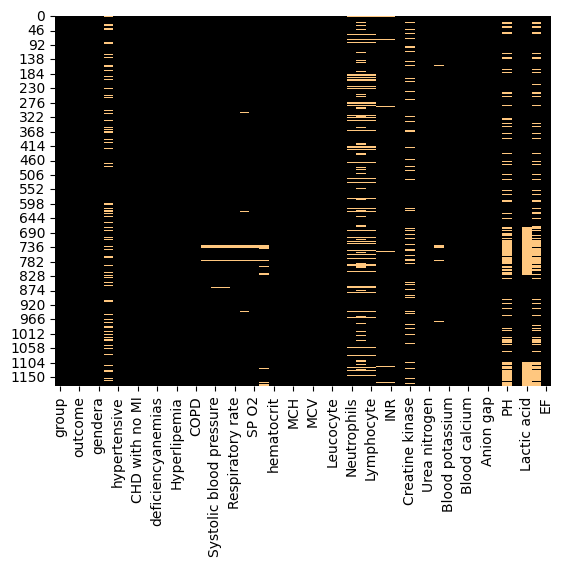

Since there are a lot of nulls in the above mentioned columns, we might lose a lot of information if we remove the all the null rows, instead it is better to drop fill the null values with the mean of that column. This way we can atleast try to preserve the information from the other features of those datapoints. We can change fill the null values using `df.fillna(df.mean())`

### Dropping features that are not relevant
Let us drop the columns from the dataset as they are not as important as the other columns. We can do this by using the `df.drop()` method. For this dataset we are dropping the `group` and the `ID`columns as they have not importance in predicting the survival rate of the patients.

### Creating new features
We need to create subsets of this dataframe for different analyses and hypotheses testing purposes. We are going to create 3 sub dataframes from the original data.
1. Demographic Data: `demo_df` is the dataframe containing all the demographic features in the data.
2. Vital Signs Data: `vital_df` is the dataframe containing all the vital signs variables
3. Laboratory Data: `lab_df` is the dataframe containing all the lab information of the patient.

### Train-Test Split
We need to split the data into train and test sets, so that we can evaluate the preformance of the model. We use the training data to train the model and then we compute the evaluation metrics on the test data. Since the model as not seen the test data, it serves as a good way to measure how well the model perfoms on new data.

### Scaling the data
We can use the `StandardScaler` from sklearn to scale the data and make sure that the mean is 0 and variance is 1. This helps to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm.



### Exploratory Data Analysis (EDA)
>Note: Please refer the section 7: References - Python Code which is located at the end of the notebook for the detailed code

We are going to dive deeper into the data and see what we are the high level characteristics and correlations in the data before we can perform our analysis.

* First we can get a snapshot of the data and its distributions by using the `df.describe()` method which gives the following result

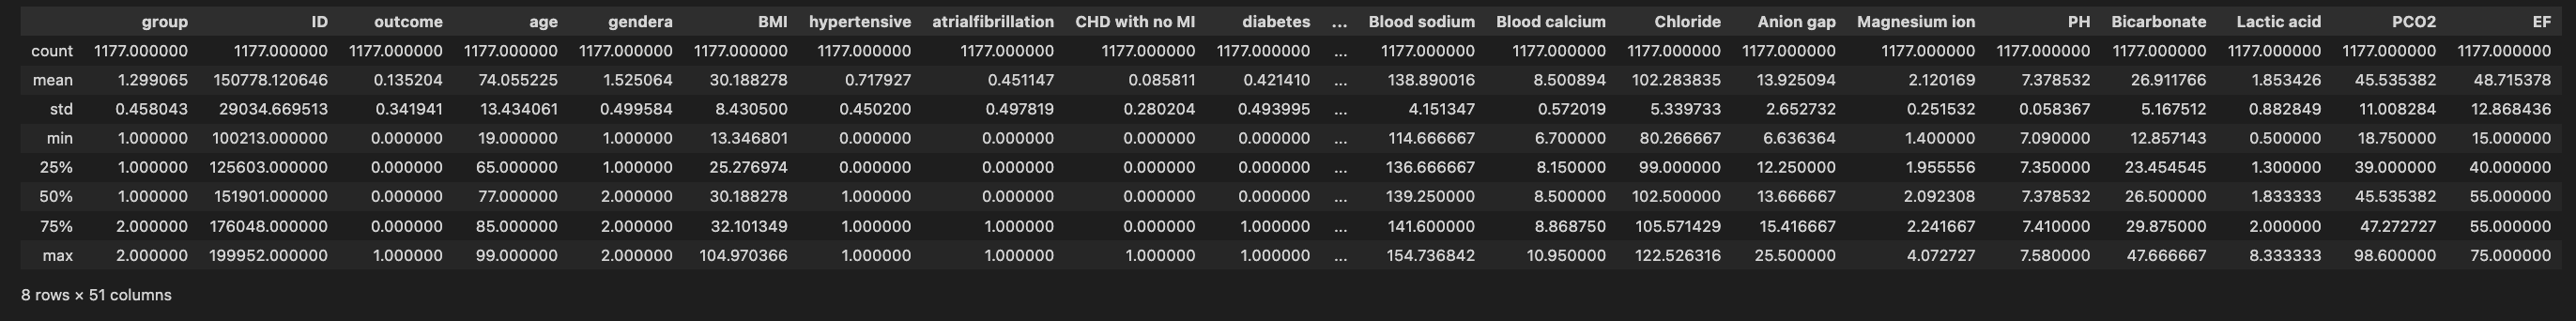

* We need to now, check if the outcome classes in the dataset are balanced. We can check that by plotting a countplot for the `outcome` variable with the following code `sns.countplot(data=df,x="outcome")` which looks like the following

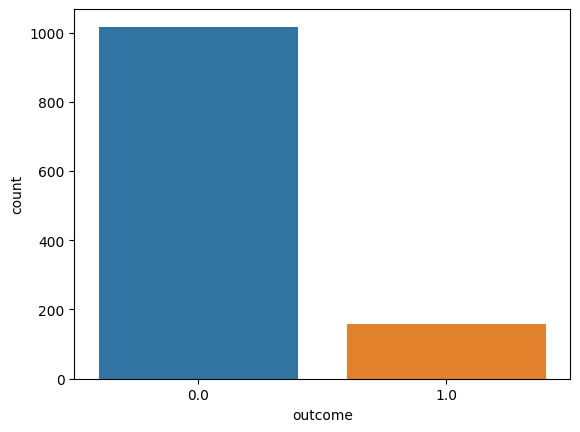

This shows that the data has majority of the alive patients since `0` signifies alive patients.

* Let us plot the correlations between the variouis features and the outcome variable using `df.corr()` method as shown in the image below

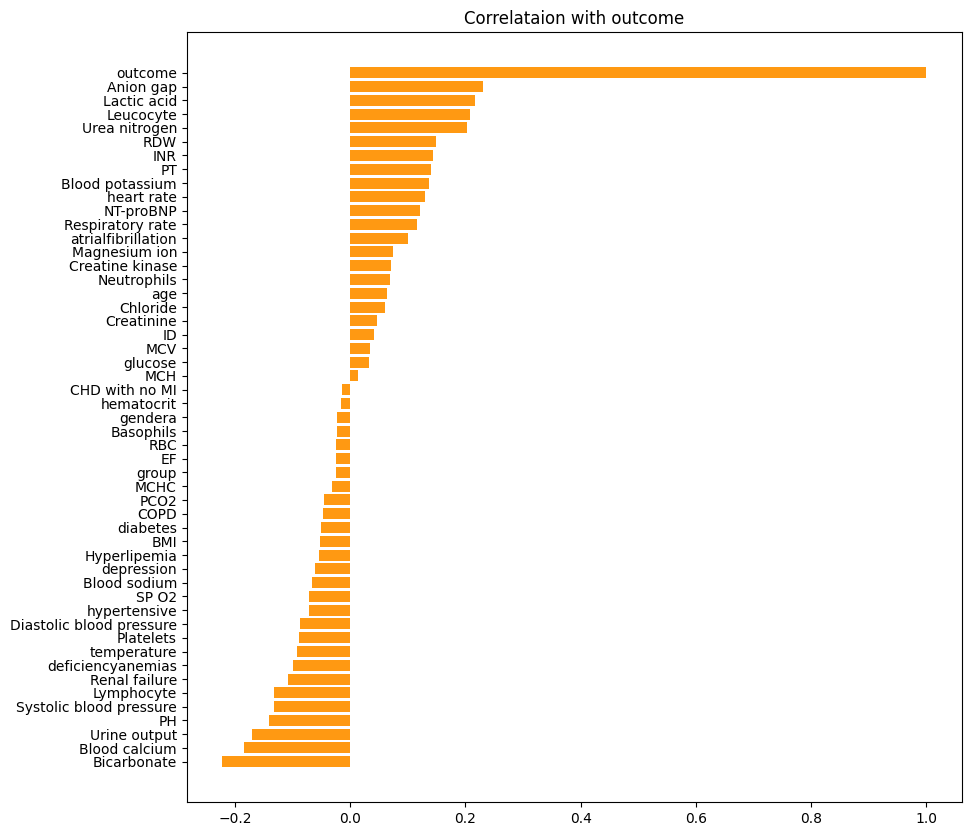

We can see that `Anion gap`, `Lactic acid`, `Leucocyte` are the top 3 most positively correlated features and `Bicarbonate`, `Blood calcium` and `Urine output` are the top 3 most negatively correlated features.

* Let us visualize the outcome variable with a few features from the data.

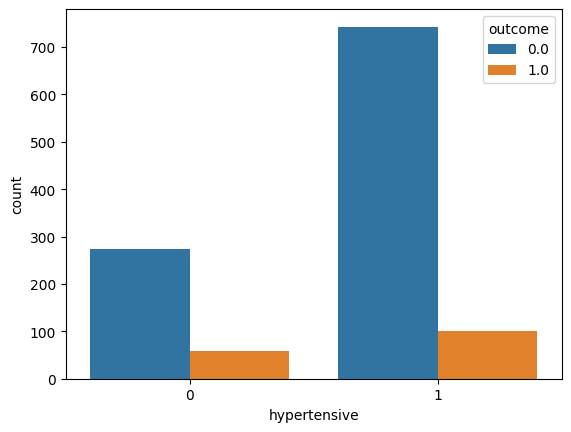

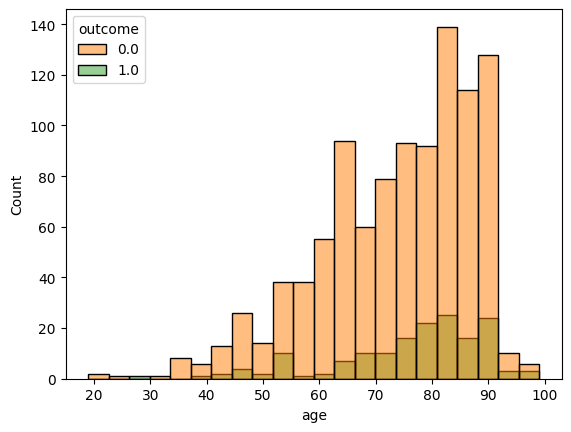



## 4. Methodology
As the goal of this project is the predict the survival rate of the ICU patients, a `Logistic Regression` and `Poission Regression` models are used for this purpose. 
> **Logistic Regression**: Logistic Regression is a statistical method used for binary classification tasks, predicting the probability that an instance belongs to a particular class. Unlike linear regression, which predicts a continuous outcome, logistic regression models the probability of the dependent variable taking on the value 1. Logistic regression is widely used in medical research, finance, marketing, and various other fields for binary classification tasks.

> **Poission Regression**: Poisson regression is traditionally used for count data and is not a direct choice for binary classification. However, it can be adapted for binary outcomes when the data represent rare events, and the assumption of the Poisson distribution is met. The Poisson regression assumes that the mean and variance of the response variable are equal, which may not always hold for binary outcomes.

We need to build the above two models and evaluate which model performs better for our dataset.

### Testing our Hypothesis:
1. **Demographic Characteristics and Mortality**: To test this hypothesis we are going to use a subset of the dataset with `Age`, `Sex` and perform the following statistical tests:
    1. Chi-Square Test: Compare the observed and expected frequencies of mortality across different categories of vital signs (e.g., mortality rates among different ranges of respiratory rates).
    2. T-Test or ANOVA: Compare means of continuous demographic variables (e.g., age) between two or more groups (survivors vs. non-survivors).   

The resaons for choosing the above tests:
* The chi-squared test is a statistical method used for categorical data analysis, specifically to assess the independence between two categorical variables. The test is used to assess whether there is a significant association or independence between two categorical variables. In the context of demographic characteristics(e.g. gender) and mortality, it helps determine whether there is a significant difference in mortality rates across different vital signs (e.g., ethnic groups).
* The t-test is a statistical method commonly used to compare means between two groups and assess whether the observed differences are statistically significant. The t-test is robust and reliable, even with small sample sizes, especially when assumptions regarding normality and homogeneity of variances are met. This makes it suitable for studies with limited data.

<br>

2. **Vital Signs and Mortality**:  To test this hypothesis we are going to use a subset of the dataset with the vital signs and perform the following statistical tests:
    1. Correlation Analysis: Examining the correlation between continuous vital sign variables and the outcome (in-hospital mortality).
    2. Receiver Operating Characteristic (ROC) Curve Analysis: Assess the discriminatory power of vital signs by plotting ROC curves and calculating the area under the curve (AUC).

The reasons for choosing the above tests:
*  The Correlation analysis is often used in the exploratory phase of data analysis to identify potential associations between variables. It can reveal whether there is a linear relationship between vital sign characteristics (e.g., heart rate, SBP) and the outcome (e.g., in-hospital mortality). Correlation coefficients (e.g., Pearson correlation coefficient) provide a quantitative measure of the strength and direction of the relationship between two variables. A positive correlation indicates a positive linear relationship, while a negative correlation suggests a negative linear relationship.
* Receiver Operating Characteristic (ROC) Curve Analysis is commonly used in the context of binary classification problems, such as predicting mortality (binary outcome: survival vs. mortality) based on vital signs. ROC Curve Analysis evaluates the discriminatory power of a model or a set of variables (e.g., vital signs) in distinguishing between two classes (e.g., survivors and non-survivors). This is especially relevant when testing the hypothesis that certain vital signs can discriminate between individuals who survive and those who do not.


After validating our hypotheses we then create a basic Logistic Regression Model on all the features in the dataset and check the model perfomance.


>Note: Please refer the section 7: References - Python Code which is located at the end of the notebook for the detailed code
#### Chi-Square Test on Demographic Characteristics
We are perfoming the chi-square test on the demographic feature `gender`. 
**Null Hypothesis (H0)**: The null hypothesis assumes independence or no association between the gender demographic feature and the outcome variable (e.g., mortality status).
> We got a p-value of `0.488` 

As the p-value is greater than the significance level(which is 0.10), we do not have enough evidence to reject the null hypothesis. In the context of gender, it suggests that there is no statistically significant association between gender and the outcome variable based on the observed data.

#### T-test on Demographic Characteristics
We are performing the t-test on the demographic feature `age`.
**Null Hypothesis (H0)**: There is no significant difference in the means of the age demographic between survivors and non-survivors.
> We got a p-value of `0.0259`

The T-Statistic indicates the magnitude of the difference between the means. As the p-value is less than the significance level(which is 0.10), we reject the null hypothesis and conclude that there is a significant difference in the means of the continuous variable related to demographic characteristics between survivors and non-survivors.

#### Correlation Analysis on Vital Signs
We are performing a correlation analysis on the `heart rate` feature in the dataset. 
**Null Hypothesis (H0)**: There is no significant correlation between heart rate vitals signs and mortality.
> We got a Correlation Coefficient of `0.129`

Correlation Coefficient indicates the strength and direction of the correlation. As the correlation coeficient is less than 0.5 the relation is not very strong. We can interpret the result as a mild positive correlation.

#### Receiver Operating Characteristic (ROC) Curve Analysis on Vital Signs
We are performing the ROC curve analysis on the `Urine output` feature. 
> We got an AUC ROC value of `0.680` and the following curve

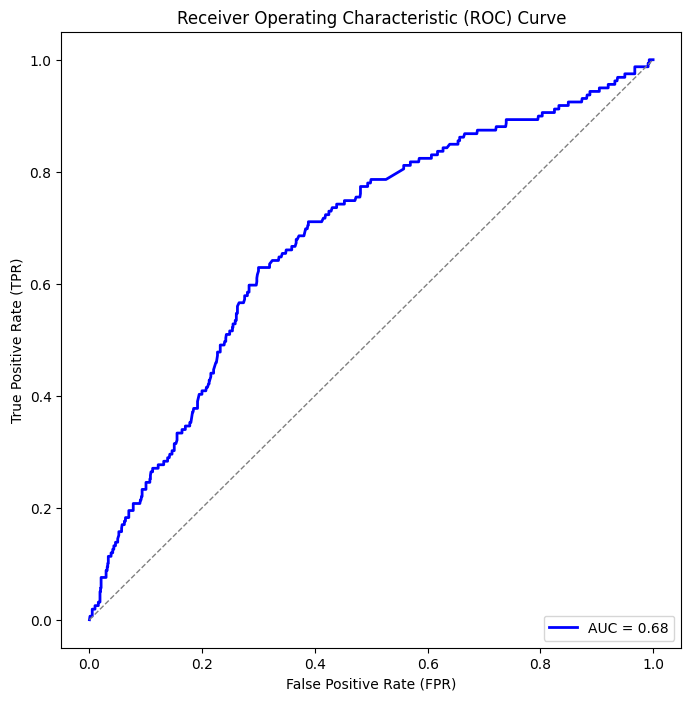

As the AUC-ROC is greater than 0.5, it suggests that urine output is a useful predictor of mortality. If it's close to 0.5, the variable may not be a strong predictor.

### Model Evaluation and Selection

#### Poisson Regression
Let us first start with the Poisson Regression model, we can use the statsmodels library in Python to build this.
Assumptions of this model are:
* **Linearity**: The relationship between the predictor variables and the log of the expected counts should be linear. For binary outcomes, it's important to assess whether the log-linear relationship is appropriate for modeling the log-odds of success.
* **Independence**: Observations should be independent of each other. In a binary classification context, this assumption implies that the probability of one observation belonging to a particular class does not depend on the outcome of another observation.
* **Rare Events**: Poisson regression for binary outcomes assumes that the events are rare. In practical terms, this means that the probability of success for each observation should be small.

We are trying out the poisson model because the dataset is very unbalanced with respect to the outcome variable i.e. it has a majority of survivors than deaths. And the observations are assumed to be independent of each other because the well being of patient A is not going to affect the well being of patient B.
Below are the base models used in each case:

Poission Regreesion Model
```python
# Fit Poisson regression model
poisson_model = sm.GLM(
    y_train, sm.add_constant(X_train), family=sm.families.Poisson()
).fit()
# # Make predictions on the test set
predicted_counts = poisson_model.predict(sm.add_constant(X_test))
```

Logistic Regression Model
```python
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = logistic_model.predict(X_test)
```



#### Hyperparameter Tuning
After building the base model we need to now tune the hyperparameters to get optimal accuracy for the our dataset. We are using GridSearch for tuning the hyperparameters. We get the following best hyperparameters:

>Best Hyperparameters for the logistic model: {'C': 0.012742749857031334}
Test Accuracy: 0.8728813559322034

>Best Hyperparameters for the poisson model: {'regressor__alpha': 0.1}
Test Accuracy: 0.8686440677966102

We need to note that the model's performance has not improved drastically even after tuning the hyperparameters; this could mean that the underlying complexity of the relationship between the selected features and the outcome variable is not adequately captured by the chosen model, or that the dataset itself may have inherent limitations and challenges that hinder substantial performance gains through hyperparameter tuning alone. Further investigation into the model's architecture, feature selection, and potential external factors influencing the predictions is warranted to enhance its overall predictive capability.

### Model Commparison
Here we need to evaluate the model perfomance by using various evaluation metrics. The metrics used in this analysis are accuracy, precision, recall, F1 score, AUC-ROC as we are working with a classification problem. Here are the evaluation metrics computed:
* For the Logistic Regression Model
    * Accuracy: 0.8728813559322034
    * Precision: 0.6666666666666666
    * Recall: 0.125
    * F1 Score: 0.21052631578947367
    * AUC-ROC: 0.8000919117647058

* For the Poisson Regression Model:
    * Accuracy: 0.8686440677966102
    * Precision: 0.5714285714285714
    * Recall: 0.125
    * F1 Score: 0.20512820512820512
    * AUC-ROC: 0.7766544117647058

Here are the AUC ROC curves of the above models

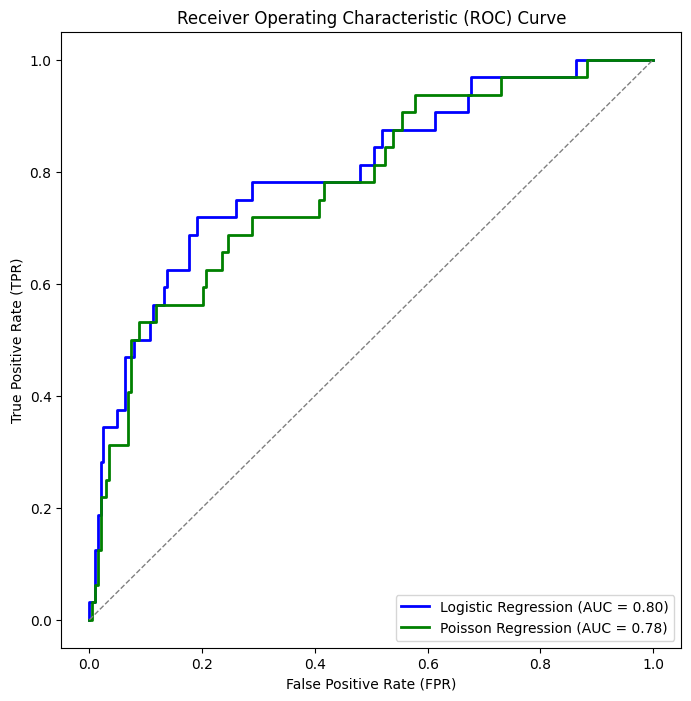


### Model Improvement
From the above analysis we can see that Logistic Regressiom model is outperforming the Poisson Regression Model. To improve the Logistic model further, we can try to apply the following techniques:
- Feature Selection using Sklearn
- Regularization

The above techniques do not gurantee an improvement but we can atleast make sure that we are using the most important features and not overfitting the training data.

After applying the above techniques we can see that there is an improvement in the following metrics:
* Before applying the above techniques:
    * Accuracy: 0.8728813559322034
    * Precision: 0.6666666666666666
    * Recall: 0.125
    * F1 Score: 0.21052631578947367
    * AUC-ROC: 0.8000919117647058

* After applying the above techniques:
    * Accuracy: 0.8771186440677966
    * Precision: 0.8
    * Recall: 0.125
    * F1 Score: 0.21621621621621623
    * AUC-ROC: 0.8000919117647058

We can see that there is a slight improvement in all the metrics showing that, we can reduce the feature set and still get a good perfomance. The regularization ensures that even though there are many features we are not going to overfit the model and memorize the entire training set. It also ensures that we are generalizing the model so that it performs well on the test set.


# 5. Results and Interpretation
After performing the above analysis we have the following findings

## Hypotheses Test Results
From our original 2 hypotheses we were able to test and confirm the following
1. Demographic Characteristics and Mortality: 
    * The Chi-square test results shows that gender of patient is not a significant predictors of in-hospital mortality.
    * The T-test result shows that the age of a patient is a significant predictor of in-hospital mortality.
The above results  makes sense as it is very common to see ailments in people at old age. As old people also do not have a very strong immunity and recovery power more deaths are more likely. Whereas gender does not affect the mortality of a person, as male and female genders have the same recuperative power in case any strikes.

2. Vital Signs and Mortality:
    * The Correlation Analysis shows that the heart rate of a persom(within 24hrs of being admitted) is not a very strong predictor of mortality. 
    * The AUC-ROC analysis shows that the urine output of a patient is a good predictor of mortality.
The above results make sense as the heart rate of a patient when he was admitted might be good, but it might soon worsen and lead to a heart attack. This shows that we  might need heart rate information of the patients throughout their time in the hospital which might help us to find interesting temporal correlations in the data. Similarly the Logistic Regression with the Urine output gave an ROC AUC values greater than 0.5 which implies that it is a good predictor of mortality. We need to more data on this to see why this is the case.

## Model Results
We have a used a `Logistic Regression` and `Poisson Regression` model for our analysis. We have performed hyperparameter tuning and also feature selection for the logistic regression model. From the above results we can see that:
* For the Logistic Regression Model:
    * Accuracy: 0.8728813559322034
    * Precision: 0.6666666666666666
    * Recall: 0.125
    * F1 Score: 0.21052631578947367
    * AUC-ROC: 0.8000919117647058
***
* For the Poisson Regression Model:
    * Accuracy: 0.8686440677966102
    * Precision: 0.5714285714285714
    * Recall: 0.125
    * F1 Score: 0.20512820512820512
    * AUC-ROC: 0.7766544117647058

The above metrics show that
* The Logistic Regression model has a slightly higher accuracy.
* The Logistic Regression model has a higher precision, indicating a better ability to correctly identify positive cases.
* Both models perform equally in terms of recall.
* The F1 score is quite similar between the two models, with a slight advantage for the Logistic Regression model.
* The Logistic Regression model has a higher AUC-ROC, suggesting better overall performance in distinguishing between the classes.

**Overall Conclusion**: While both models have similar performance in terms of recall and F1 score, the Logistic Regression model outperforms the Poisson Regression model in terms of accuracy, precision, and AUC-ROC. The choice between the models may depend on the specific goals of the analysis and the importance placed on different evaluation metrics.



# 6. Conclusion
**Main Discoveries**: The Logistic Regression model outperformed the Poisson Regression model in terms of accuracy, precision, and AUC-ROC.
Both models had low recall, indicating challenges in identifying positive cases.
The features used in the models, particularly those related to urine output, may have limited predictive power for the given outcome.

**Meeting Hypotheses**:
* Demographic Characteristics and Mortality: The statistical tests performed on the demographic features does not help us reject the null hypothesis. This suggests that the selected features may not be strong predictors of mortality. 
* Vital Signs and Mortality: The statistical tests performed on the vital sign features went moderately well, but the low recall indicates challenges in identifying individuals at risk of mortality based on vital signs, especially urine output.

**Limitations of the Project**: Here are the limitation of this project which could address in the future:
* Feature Selection: The choice of features may not have captured the full complexity of the relationship between patient characteristics, vital signs, and mortality.
* Data Quality: Limitations in data quality, missing values, or outliers may have affected model performance.
* Model Complexity: The choice of logistic and Poisson regression may be limiting. More sophisticated models or ensemble approaches could be explored.

**Suggestions for Future Research**: These are the future improvements for the project:
* Feature Engineering: Explore additional features or engineering techniques to capture more nuanced patterns in patient data.
* Data Quality Improvement: Address missing values and outliers, and consider data imputation or cleaning techniques.
* Model Complexity: Experiment with more advanced models, such as random forests or gradient boosting, to capture non-linear relationships.
* Temporal Analysis: Consider analyzing the temporal aspect of vital signs and their impact on mortality over time.

**Overall Recommendations**:
Consider a more comprehensive set of features that includes additional clinical variables, laboratory results, and comorbidities.
Evaluate the models on a larger and more diverse dataset to ensure generalizability.
Collaborate with domain experts to refine hypotheses and explore additional factors influencing mortality.
In summary, while the models provided insights into the relationships between demographic characteristics, vital signs, and mortality, there is room for improvement. Future research should focus on refining feature selection, addressing data quality issues, and exploring more sophisticated modeling approaches to enhance predictive accuracy and clinical relevance.

# 7. Reference and Appendix
* References:
    - https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction/data
    - https://seaborn.pydata.org/
    - https://pandas.pydata.org/docs/
    - https://scikit-learn.org/stable/
    - https://numpy.org/doc/
    - https://matplotlib.org/stable/index.html
    - https://www.statsmodels.org/stable/index.html
    - https://docs.scipy.org/doc/scipy/

***

* Appendix:
```python
# importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, pearsonr, spearmanr, ttest_ind
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, PoissonRegressor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Importing the data
df = pd.read_csv("./data01.csv")
# Checking for nulls
df.isnull().sum()
df.dropna(subset=["outcome"], inplace=True)
# Filling the null values with the mean value
df = df.fillna(df.mean())
# Dropping irrelevant features
df = df.drop(columns=["group", "ID"])
# Creating new features in the data
demo_df = df[["outcome", "age", "gendera"]]
vital_df = df[
    [
        "heart rate",
        "Systolic blood pressure",
        "Diastolic blood pressure",
        "Respiratory rate",
        "temperature",
        "SP O2",
        "Urine output",
    ]
]
# Split the data into training and testing sets
X = df.drop("outcome", axis=1)
y = df["outcome"]
# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=df["outcome"],
)
#EDA on the dataset
df.describe()
sns.countplot(data=df,x="outcome")
#Correlation Plot
fig = plt.figure(figsize = (10, 10))
target_corr = pd.DataFrame(df.corr()['outcome'].sort_values(ascending = True))
plt.barh(target_corr.index, target_corr['outcome'],color="#FF9912")
plt.title('Correlataion with outcome')
plt.show()
sns.countplot(data=df, x="hypertensive", hue="outcome")
sns.histplot(data=df,x='age',hue='outcome',palette='Paired_r')
##Chi-Square test on Gender
contingency_table = pd.crosstab(demo_df["gendera"], y)
# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
# Display results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
## T-test on Age
mortality_status = (
    "MortalityStatus"  # Replace with your actual variable indicating mortality status
)
survivors = df[df["outcome"] == 0]["age"]
non_survivors = df[df["outcome"] == 1]["age"]
# Perform t-test
t_statistic, p_value = ttest_ind(survivors, non_survivors, equal_var=False)
# Display results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)
## Correlation Analysis on heart rate
vital_signs = df["heart rate"]
mortality = df["outcome"]
# Perform correlation analysis (Pearson)
correlation_coefficient, p_value = pearsonr(vital_signs, mortality)
# Display results
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)
## Receiver Operating Characteristic (ROC) Curve Analysis on Urine output
urine_output = df["Urine output"]
mortality_status = df["outcome"]
# Split the data into training and testing sets
model = LogisticRegression()
model.fit(urine_output.values.reshape(-1, 1), mortality_status)
# Obtain predicted probabilities
y_probs = model.predict_proba(urine_output.values.reshape(-1, 1))[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(mortality_status, y_probs)
# Calculate AUC-ROC
auc_roc = roc_auc_score(mortality_status, y_probs)
print('AUC ROC:', auc_roc)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
# Poisson Regreession Model
poisson_model = sm.GLM(
    y_train, sm.add_constant(X_train), family=sm.families.Poisson()
).fit()
print(poisson_model.summary())
# Make predictions on the test set
predicted_counts = poisson_model.predict(sm.add_constant(X_test))
# Convert predicted counts to probabilities for binary outcome
predicted_probabilities = 1 - np.exp(-predicted_counts)
# Define a threshold for converting predicted counts to binary outcomes
threshold = 0.5  # You may adjust this based on your specific needs
# Convert predicted counts to binary outcomes based on the threshold
predicted_binary = (predicted_probabilities > threshold).astype(int)
print("Accuracy with the poisson model:",  np.mean(predicted_binary == y_test))
# Logistic Regression Model
logistic_model = LogisticRegression()
# Fit the model
logistic_model.fit(X_train, y_train)
# Make predictions on the test set
predictions = logistic_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
print(f"Accuracy with the logistic model: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
# Hyperparameter tuning for logistic regression model
param_grid = {"C": np.logspace(-4, 4, 20)}
# Perform grid search with 5-fold cross-validation
logistic_model = LogisticRegression(solver="liblinear")
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Train the model with the best hyperparameters
best_logistic_model = LogisticRegression(C=best_params["C"])
best_logistic_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = best_logistic_model.predict(X_test)
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
# Hyperparameter tuning for poisson regression model
# Create a pipeline with Poisson regression
poisson_pipe = Pipeline([
    ('regressor', PoissonRegressor())
])
# Define hyperparameter grid
param_grid = {
    'regressor__alpha': [0.0, 0.1, 0.5, 1.0],  # Regularization parameter
}
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(poisson_pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Train the model with the best hyperparameters
best_poisson_model = sm.GLM(
    y_train, sm.add_constant(X_train), family=sm.families.Poisson()
)
best_poisson_model_results = best_poisson_model.fit()
# Make predictions on the test set
predicted_counts = best_poisson_model_results.predict(sm.add_constant(X_test))
# Convert predicted counts to binary outcomes based on a threshold
threshold = 0.5  # You may adjust this based on your specific needs
predicted_binary = (predicted_counts > threshold).astype(int)
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, predicted_binary)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
# For the Logistic Regression Model
# Predictions from the logistic regression model
y_pred_logistic = best_logistic_model.predict(X_test)
# Convert predicted probabilities to binary outcomes based on a threshold
threshold = 0.5
y_pred_binary_logistic = (
    best_logistic_model.predict_proba(X_test)[:, 1] > threshold
).astype(int)
# Calculate metrics
accuracy_logistic = accuracy_score(y_test, y_pred_binary_logistic)
precision_logistic = precision_score(y_test, y_pred_binary_logistic)
recall_logistic = recall_score(y_test, y_pred_binary_logistic)
f1_logistic = f1_score(y_test, y_pred_binary_logistic)
roc_auc_logistic = roc_auc_score(
    y_test, best_logistic_model.predict_proba(X_test)[:, 1]
)
# Display metrics
print("For the Logistic Regression Model:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)
print("AUC-ROC:", roc_auc_logistic)
print("--------------")
# For the Poisson Regression Model
# Predicted counts from the Poisson regression model
predicted_counts_poisson = best_poisson_model_results.predict(sm.add_constant(X_test))
# Convert predicted counts to binary outcomes based on a threshold
threshold = 0.5
y_pred_binary_poisson = (predicted_counts_poisson > threshold).astype(int)
# Calculate metrics
accuracy_poisson = accuracy_score(y_test, y_pred_binary_poisson)
precision_poisson = precision_score(y_test, y_pred_binary_poisson)
recall_poisson = recall_score(y_test, y_pred_binary_poisson)
f1_poisson = f1_score(y_test, y_pred_binary_poisson)
roc_auc_poisson = roc_auc_score(y_test, predicted_counts_poisson)
# Display metrics
print("For the Poisson Regression Model:")
print("Accuracy:", accuracy_poisson)
print("Precision:", precision_poisson)
print("Recall:", recall_poisson)
print("F1 Score:", f1_poisson)
print("AUC-ROC:", roc_auc_poisson)
# Plotting the AUC ROC curves
fpr_logistic, tpr_logistic, _ = roc_curve(
    y_test, best_logistic_model.predict_proba(X_test)[:, 1]
)
roc_auc_logistic = roc_auc_score(
    y_test, best_logistic_model.predict_proba(X_test)[:, 1]
)
fpr_poisson, tpr_poisson, _ = roc_curve(
    y_test, best_poisson_model_results.predict(sm.add_constant(X_test))
)
roc_auc_poisson = roc_auc_score(
    y_test, best_poisson_model_results.predict(sm.add_constant(X_test))
)
plt.figure(figsize=(8, 8))
plt.plot(
    fpr_logistic,
    tpr_logistic,
    color="blue",
    lw=2,
    label=f"Logistic Regression (AUC = {roc_auc_logistic:.2f})",
)
plt.plot(
    fpr_poisson,
    tpr_poisson,
    color="green",
    lw=2,
    label=f"Poisson Regression (AUC = {roc_auc_poisson:.2f})",
)
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
# Create logistic regression model
logistic_model = LogisticRegression()
# Select top k features using RFE
rfe = RFE(logistic_model, n_features_to_select=5)  # Choose the appropriate value
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)
# Create logistic regression model with L1 regularization
logistic_model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.012742749857031334)
logistic_model_l1.fit(X_train_selected, y_train)
# Create logistic regression model with L2 regularization
logistic_model_l2 = LogisticRegression(penalty='l2', C=1.0)
logistic_model_l2.fit(X_train_selected, y_train)
# Evaluate the improved logistic regression model
y_pred_improved = logistic_model_l2.predict(X_test_selected)
# Calculate metrics
accuracy_improved = accuracy_score(y_test, y_pred_improved)
precision_improved = precision_score(y_test, y_pred_improved)
recall_improved = recall_score(y_test, y_pred_improved)
f1_improved = f1_score(y_test, y_pred_improved)
roc_auc_improved = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test)[:, 1])
# Display metrics
print("Improved Logistic Regression Metrics:")
print("Accuracy:", accuracy_improved)
print("Precision:", precision_improved)
print("Recall:", recall_improved)
print("F1 Score:", f1_improved)
print("AUC-ROC:", roc_auc_improved)
```